<a href="https://colab.research.google.com/github/FGalvao77/Exploratory-Data-Analysis-Machine-Learning-with-Python-COVID-19-/blob/main/Exploratory_Data_Analysis_%26_Machine_Learning_with_Python_%5BCOVID_19%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis & Machine Learning with Python [COVID-19]**
---
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math 
import time
import datetime
import operator
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import (mean_absolute_error as mae, 
                             mean_squared_error as mse)

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [ ]:
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv >> confirmed.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1703k  100 1703k    0     0  36.1M      0 --:--:-- --:--:-- --:--:-- 36.1M


In [ ]:
confirmed_cases = pd.read_csv('confirmed.csv', low_memory=True)

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/19/23,1/20/23,1/21/23,1/22/23,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,208062,208084,208084,208084,208097,208289,208324,208324,208432,208435
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334084,334084,334097,334101,334101,334113,334124,334135,334144,334153
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271307,271316,271328,271335,271346,271354,271360,271364,271369,271369
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47820,47820,47820,47820,47820,47820,47820,47820,47820,47839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105184,105184,105184,105184,105184


In [ ]:
confirmed_cases.shape

(289, 1107)

In [ ]:
confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/19/23', '1/20/23', '1/21/23', '1/22/23', '1/23/23', '1/24/23',
       '1/25/23', '1/26/23', '1/27/23', '1/28/23'],
      dtype='object', length=1107)

In [ ]:
days_year = 365
day_today = datetime.datetime.today().day

days_year, day_today

(365, 29)

In [ ]:
cols_limit  = days_year + day_today

cols_limit 

394

In [ ]:
confirmed_cases.columns[:-cols_limit]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/21/21', '12/22/21', '12/23/21', '12/24/21', '12/25/21', '12/26/21',
       '12/27/21', '12/28/21', '12/29/21', '12/30/21'],
      dtype='object', length=713)

In [ ]:
len(confirmed_cases.columns) - cols_limit

713

In [ ]:
confirmed_cases = pd.read_csv('confirmed.csv', low_memory=True)

confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/19/23,1/20/23,1/21/23,1/22/23,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,208062,208084,208084,208084,208097,208289,208324,208324,208432,208435
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334084,334084,334097,334101,334101,334113,334124,334135,334144,334153
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271307,271316,271328,271335,271346,271354,271360,271364,271369,271369
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47820,47820,47820,47820,47820,47820,47820,47820,47820,47839
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105184,105184,105184,105184,105184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,338407,338656,338986,338986,338986,339502,339743,339949,340172,340172


In [ ]:
# confirmed_cases = confirmed_cases.iloc[:, :-383]

# confirmed_cases.shape

In [ ]:
confirmed_cases.iloc[:, :371].columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
confirmed_cases = confirmed_cases.iloc[:, :371]

confirmed_cases.shape

(289, 371)

In [ ]:
confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
len(confirmed_cases['Country/Region'].unique()), confirmed_cases['Country/Region'].unique()

(201, array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
        'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
   

In [ ]:
confirmed_cases.shape

(289, 371)

In [ ]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 371 entries, Province/State to 1/22/21
dtypes: float64(2), int64(367), object(2)
memory usage: 837.8+ KB


In [ ]:
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv >> deaths.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1176k  100 1176k    0     0  22.9M      0 --:--:-- --:--:-- --:--:-- 22.9M


In [ ]:
death_cases = pd.read_csv('deaths.csv', low_memory=True)

death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/19/23,1/20/23,1/21/23,1/22/23,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7864,7864,7864,7864,7870,7871,7872,7872,7875,7876
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1931,1931,1931,1931,1931


In [ ]:
death_cases.shape

(289, 1107)

In [ ]:
# death_cases = death_cases.iloc[:, :-383]

# death_cases.shape

In [ ]:
death_cases = death_cases.iloc[:, :371]

death_cases.shape

(289, 371)

In [ ]:
death_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 371 entries, Province/State to 1/22/21
dtypes: float64(2), int64(367), object(2)
memory usage: 837.8+ KB


In [ ]:
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv >> recovered.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  975k  100  975k    0     0  31.7M      0 --:--:-- --:--:-- --:--:-- 31.7M


In [ ]:
recovered_cases = pd.read_csv('recovered.csv', low_memory=False)

recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/19/23,1/20/23,1/21/23,1/22/23,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
recovered_cases.shape

(274, 1107)

In [ ]:
# recovered_cases = recovered_cases.iloc[:, :-383]

# recovered_cases.shape

In [ ]:
recovered_cases = recovered_cases.iloc[:, :371]

recovered_cases.shape

(274, 371)

In [ ]:
recovered_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 371 entries, Province/State to 1/22/21
dtypes: float64(2), int64(367), object(2)
memory usage: 794.3+ KB


In [ ]:
confirmed_cases.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
death_cases.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
recovered_cases.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
cols_interest = confirmed_cases.keys()

cols_interest

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=371)

In [ ]:
confirmed = confirmed_cases.loc[:, cols_interest[4]:cols_interest[-1]]
deaths = death_cases.loc[:, cols_interest[4]:cols_interest[-1]]
recoveries = recovered_cases.loc[:, cols_interest[4]:cols_interest[-1]] 

In [ ]:
len(confirmed), len(deaths), len(recoveries)

(289, 289, 274)

In [ ]:
print(f'Total columns: {len(confirmed.columns)}')
confirmed.columns

Total columns: 367


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=367)

In [ ]:
print(f'Total columns: {len(deaths.columns)}')
deaths.columns

Total columns: 367


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=367)

In [ ]:
print(f'Total columns: {len(recoveries.columns)}')
recoveries.columns

Total columns: 367


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
      dtype='object', length=367)

In [ ]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21
0,0,0,0,0,0,0,0,0,0,0,...,53690,53775,53831,53938,53984,54062,54141,54278,54403,54483
1,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655
2,0,0,0,0,0,0,0,0,0,0,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124
3,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416
4,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269


In [ ]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 367 entries, 1/22/20 to 1/22/21
dtypes: int64(367)
memory usage: 828.7 KB


In [ ]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21
0,0,0,0,0,0,0,0,0,0,0,...,2308,2314,2324,2336,2339,2343,2346,2354,2363,2370
1,0,0,0,0,0,0,0,0,0,0,...,1256,1261,1265,1270,1277,1281,1287,1291,1296,1303
2,0,0,0,0,0,0,0,0,0,0,...,2819,2822,2827,2831,2836,2840,2843,2849,2853,2856
3,0,0,0,0,0,0,0,0,0,0,...,87,88,88,91,91,91,92,92,93,93
4,0,0,0,0,0,0,0,0,0,0,...,424,425,428,431,436,439,442,444,448,452


In [ ]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 367 entries, 1/22/20 to 1/22/21
dtypes: int64(367)
memory usage: 828.7 KB


In [ ]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21
0,0,0,0,0,0,0,0,0,0,0,...,44850,45298,45434,45465,45868,46359,46554,46759,46887,46912
1,0,0,0,0,0,0,0,0,0,0,...,38860,39246,39625,40090,40453,40870,41464,41969,42426,42895
2,0,0,0,0,0,0,0,0,0,0,...,69791,69992,70188,70373,70554,70747,70933,71127,71343,71552
3,0,0,0,0,0,0,0,0,0,0,...,8070,8091,8116,8116,8154,8154,8349,8399,8474,8537
4,0,0,0,0,0,0,0,0,0,0,...,15631,16008,16120,16225,16347,16677,16822,16921,17176,17223


In [ ]:
recoveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 367 entries, 1/22/20 to 1/22/21
dtypes: int64(367)
memory usage: 785.7 KB


In [ ]:
dates = confirmed.keys()

len(dates), dates

(367, Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20',
        ...
        '1/13/21', '1/14/21', '1/15/21', '1/16/21', '1/17/21', '1/18/21',
        '1/19/21', '1/20/21', '1/21/21', '1/22/21'],
       dtype='object', length=367))

In [ ]:
world_cases = []

total_deaths = []

mortality_rate = []
recovery_rate = []

total_recovered = []

total_active = []

In [ ]:
germany_cases = []
canada_cases = []
usa_cases = []
france_cases = []
italy_cases = []
japan_cases = []
uk_cases = []
spain_cases = []

brazil_cases = []
russia_cases = []
india_cases = []
china_cases = []
south_africa_cases = []
mexico_cases = []


germany_deaths = []
canada_deaths = []
usa_deaths = []
france_deaths = []
italy_deaths = []
japan_deaths = []
uk_deaths = []
spain_deaths = []

brazil_deaths = []
russia_deaths = []
india_deaths = []
china_deaths = []
south_africa_deaths = []
mexico_deaths = []


germany_recoveries = []
canada_recoveries = []
usa_recoveries = []
france_recoveries = []
italy_recoveries = []
japan_recoveries = []
uk_recoveries = []
spain_recoveries = []

brazil_recoveries = []
russia_recoveries = []
india_recoveries = []
china_recoveries = []
south_africa_recoveries = []
mexico_recoveries = []

In [ ]:
# china_cases = []
# india_cases = []
# usa_cases = []
# russia_cases = []
# italy_cases = []
# brazil_cases = []
# spain_cases = []
# germany_cases = []
# france_cases = []
# uk_cases = []

# china_deaths = []
# india_deaths = []
# usa_deaths = []
# russia_deaths = []
# italy_deaths = []
# brazil_deaths = []
# spain_deaths = []
# germany_deaths = []
# france_deaths = []
# uk_deaths = []

# china_recoveries = []
# india_recoveries = []
# usa_recoveries = []
# russia_recoveries = []
# italy_recoveries = []
# brazil_recoveries = []
# spain_recoveries = []
# germany_recoveries = []
# france_recoveries = []
# uk_recoveries = []

In [ ]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    world_cases.append(confirmed_sum)

    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)

    mortality_rate.append(death_sum / confirmed_sum)
    recovery_rate.append(recovered_sum / confirmed_sum)

    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Germany'][i].sum())
    canada_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Canada'][i].sum())
    usa_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'US'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'France'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Italy'][i].sum())
    japan_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Japan'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'United Kingdon'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Spain'][i].sum())

    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Brazil'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'India'][i].sum())
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'China'][i].sum())
    south_africa_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'South Africa'][i].sum())
    mexico_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Mexico'][i].sum())
    

    germany_deaths.append(death_cases[death_cases['Country/Region'] == 'Germany'][i].sum())
    canada_deaths.append(death_cases[death_cases['Country/Region'] == 'Canada'][i].sum())
    usa_deaths.append(death_cases[death_cases['Country/Region'] == 'US'][i].sum())
    france_deaths.append(death_cases[death_cases['Country/Region'] == 'France'][i].sum())
    italy_deaths.append(death_cases[death_cases['Country/Region'] == 'Italy'][i].sum())
    japan_deaths.append(death_cases[death_cases['Country/Region'] == 'Japan'][i].sum())
    uk_deaths.append(death_cases[death_cases['Country/Region'] == 'United Kingdon'][i].sum())
    spain_deaths.append(death_cases[death_cases['Country/Region'] == 'Spain'][i].sum())

    brazil_deaths.append(death_cases[death_cases['Country/Region'] == 'Brazil'][i].sum())
    russia_deaths.append(death_cases[death_cases['Country/Region'] == 'Russia'][i].sum())
    india_deaths.append(death_cases[death_cases['Country/Region'] == 'India'][i].sum())
    china_deaths.append(death_cases[death_cases['Country/Region'] == 'China'][i].sum())
    south_africa_deaths.append(death_cases[death_cases['Country/Region'] == 'South Africa'][i].sum())
    mexico_deaths.append(death_cases[death_cases['Country/Region'] == 'Mexico'][i].sum())
    
    
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Germany'][i].sum())
    canada_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Canada'][i].sum())
    usa_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'US'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'France'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Italy'][i].sum())
    japan_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Japan'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'United Kingdon'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Spain'][i].sum())
    
    brazil_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Brazil'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'India'][i].sum())
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'China'][i].sum())
    south_africa_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'South Africa'][i].sum())
    mexico_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Mexico'][i].sum())

In [ ]:
germany_cases[-1], germany_deaths[-1], germany_recoveries[-1]

(2106262, 50642, 1813894)

In [ ]:
usa_cases[-1], usa_deaths[-1], usa_recoveries[-1]

(25010549, 419275, 0)

In [ ]:
uk_cases[-1], uk_deaths[-1], uk_recoveries[-1]

(0, 0, 0)

In [ ]:
italy_cases[-1], italy_deaths[-1], italy_recoveries[-1]

(2441854, 84674, 1855127)

In [ ]:
japan_cases[-1], japan_deaths[-1], japan_recoveries[-1]

(357750, 4981, 279058)

In [ ]:
brazil_cases[-1], brazil_deaths[-1], brazil_recoveries[-1]

(8763517, 215442, 7746910)

In [ ]:
russia_cases[-1], russia_deaths[-1], russia_recoveries[-1]

(3637862, 67376, 3048837)

In [ ]:
china_cases[-1], china_deaths[-1], china_recoveries[-1]

(106453, 4936, 91526)

In [ ]:
india_cases[-1], india_deaths[-1], india_recoveries[-1]

(10639684, 153184, 10300838)

In [ ]:
south_africa_cases[-1], south_africa_deaths[-1], south_africa_recoveries[-1]

(1392568, 40076, 1201284)

In [ ]:
world_cases[-1], total_deaths[-1], total_recovered[-1], total_active[-1]

(98526598, 2198501, 54147168, 42180929)

In [ ]:
confirmed_sum, death_sum, recovered_sum

(98526598, 2198501, 54147168)

In [ ]:
def daily_increase(data):
    data_ = []

    for i in range(len(data)):
        if i == 0:
            data_.append(data[0])
        else:
            data_.append(data[i] - data[i-1])

    return data_

In [ ]:
world_daily_increase = daily_increase(world_cases)

germany_daily_increase = daily_increase(germany_cases)
canada_daily_increase = daily_increase(canada_cases)
usa_daily_increase = daily_increase(usa_cases)
france_daily_increase = daily_increase(france_cases)
italy_daily_increase = daily_increase(italy_cases)
japan_daily_increase = daily_increase(japan_cases)
uk_daily_increase = daily_increase(uk_cases)
spain_daily_increase = daily_increase(spain_cases)

brazil_daily_increase = daily_increase(brazil_cases)
russia_daily_increase = daily_increase(russia_cases)
india_daily_increase = daily_increase(india_cases)
china_daily_increase = daily_increase(china_cases)
south_africa_daily_increase = daily_increase(south_africa_cases)
mexico_daily_increase = daily_increase(mexico_cases)

In [ ]:
world_daily_increase[-1]

663486

In [ ]:
germany_daily_increase[-1], canada_daily_increase[-1], usa_daily_increase[-1], france_daily_increase[-1], italy_daily_increase[-1]

(17862, 5668, 191356, 23324, 13633)

In [ ]:
japan_daily_increase[-1], uk_daily_increase[-1], spain_daily_increase[-1], brazil_daily_increase[-1], russia_daily_increase[-1]

(5057, 0, 42885, 56605, 21182)

In [ ]:
india_daily_increase[-1], china_daily_increase[-1], south_africa_daily_increase[-1], mexico_daily_increase[-1]

(14256, 260, 11761, 21007)

In [ ]:
world_daily_death = daily_increase(total_deaths)

germany_daily_deaths = daily_increase(germany_deaths)
canada_daily_deaths = daily_increase(canada_deaths)
usa_daily_deaths = daily_increase(usa_deaths)
france_daily_deaths = daily_increase(france_deaths)
italy_daily_deaths = daily_increase(italy_deaths)
japan_daily_deaths = daily_increase(japan_deaths)
uk_daily_deaths = daily_increase(uk_deaths)
spain_daily_deaths = daily_increase(spain_deaths)

brazil_daily_deaths = daily_increase(brazil_deaths)
russia_daily_deaths = daily_increase(russia_deaths)
india_daily_deaths = daily_increase(india_deaths)
china_daily_deaths = daily_increase(china_deaths)
south_africa_daily_deaths = daily_increase(south_africa_deaths)
mexico_daily_deaths = daily_increase(mexico_deaths)

In [ ]:
world_daily_death[-1]

16065

In [ ]:
germany_daily_deaths[-1], canada_daily_deaths[-1], usa_daily_deaths[-1], france_daily_deaths[-1], italy_daily_deaths[-1]

(859, 176, 3772, 649, 472)

In [ ]:
japan_daily_deaths[-1], uk_daily_deaths[-1], spain_daily_deaths[-1], brazil_daily_deaths[-1], russia_daily_deaths[-1]

(108, 0, 400, 1071, 566)

In [ ]:
india_daily_deaths[-1], china_daily_deaths[-1], south_africa_daily_deaths[-1], mexico_daily_deaths[-1]

(152, 1, 575, 1440)

In [ ]:
world_daily_recovery = daily_increase(total_recovered)

germany_daily_recovery = daily_increase(germany_recoveries)
canada_daily_recovery = daily_increase(canada_recoveries)
usa_daily_recovery = daily_increase(usa_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
japan_daily_recovery = daily_increase(japan_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)

brazil_daily_recovery = daily_increase(brazil_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)
india_daily_recovery = daily_increase(india_recoveries)
china_daily_recovery = daily_increase(china_recoveries)
south_africa_daily_recovery = daily_increase(south_africa_recoveries)
mexico_daily_recovery = daily_increase(mexico_recoveries)

In [ ]:
world_daily_recovery[-1]

381757

In [ ]:
germany_daily_recovery[-1], canada_daily_recovery[-1], usa_daily_recovery[-1], france_daily_recovery[-1], italy_daily_recovery[-1]

(16246, 6939, 0, 1287, 27676)

In [ ]:
japan_daily_recovery[-1], uk_daily_recovery[-1], spain_daily_recovery[-1], brazil_daily_recovery[-1], russia_daily_recovery[-1]

(6027, 0, 0, 73818, 26976)

In [ ]:
india_daily_recovery[-1], china_daily_recovery[-1], south_africa_daily_recovery[-1], mexico_daily_recovery[-1]

(17136, 144, 17841, 27160)

In [ ]:
!curl https://raw.githubusercontent.com/FGalvao77/datasets/main/covid_19_clean_complete.csv >> covid_19_clean_complete.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3227k  100 3227k    0     0  5480k      0 --:--:-- --:--:-- --:--:-- 5480k


In [ ]:
# from google.colab import files 

# uploaded = files.upload()

In [ ]:
latest_data = pd.read_csv('covid_19_clean_complete.csv')

latest_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
latest_data.shape

(49068, 10)

In [ ]:
latest_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
unique_countries = list(latest_data['Country/Region'].unique())

len(unique_countries), unique_countries[:5], unique_countries[-5:]

(187,
 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
 ['Sao Tome and Principe', 'Yemen', 'Comoros', 'Tajikistan', 'Lesotho'])

In [ ]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []

country_mortality_rate = []

no_cases = []

for i in unique_countries:
    cases = latest_data[latest_data['Country/Region'] == i]['Confirmed'].sum()

    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), 
                                         key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country/Region'] == unique_countries[i]]['Confirmed'].sum()

    country_death_cases.append(latest_data[latest_data['Country/Region'] == unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country/Region'] == unique_countries[i]]['Recovered'].sum())

    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])

    country_mortality_rate.append(country_death_cases[i] / country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame(
    {'Country_name': unique_countries,
     'Number_of_confirmed_cases': country_confirmed_cases, 
     'Number_of_deaths': country_death_cases,
     'Number_of_recoveries': country_recovery_cases,
     'Number_of_active_cases': country_active_cases,
     'Mortality_rate': country_mortality_rate}
)

country_df.style.background_gradient(cmap='Blues')

,Country_name,Number_of_confirmed_cases,Number_of_deaths,Number_of_recoveries,Number_of_active_cases,Mortality_rate
0,US,224345948,11011411,56353416,156981121,0.049082
1,Brazil,89524967,3938034,54492873,31094060,0.043988
2,Russia,45408411,619385,25120448,19668578,0.013640
3,India,40883464,1111831,23783720,15987913,0.027195
4,Spain,27404045,3033030,15093583,9277432,0.110678
5,United Kingdom,26748587,3997775,126217,22624595,0.149457
6,Italy,26745145,3707717,15673910,7363518,0.138631
7,France,21210926,3048524,7182115,10980287,0.143724
8,Germany,21059152,871322,17107839,3079991,0.041375
9,Iran,19339267,1024136,15200895,3114236,0.052956


In [ ]:
unique_provinces = list(latest_data['Province/State'].unique())

len(unique_provinces), unique_provinces[:5], unique_provinces[-5:]

(79,
 [nan,
  'Australian Capital Territory',
  'New South Wales',
  'Northern Territory',
  'Queensland'],
 ['Anguilla',
  'British Virgin Islands',
  'Turks and Caicos Islands',
  'Falkland Islands (Malvinas)',
  'Saint Pierre and Miquelon'])

In [ ]:
province_confirmed_cases = []
province_death_cases = []
province_recovery_cases = []

province_country = []

province_mortality_rate = []

no_cases = []

for i in unique_provinces:
    cases = latest_data[latest_data['Province/State'] == i]['Confirmed'].sum()

    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), 
                                         key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province/State'] == unique_provinces[i]]['Confirmed'].sum()

    province_country.append(latest_data[latest_data['Province/State'] == unique_provinces[i]]['Country/Region'].unique()[0])
    
    province_death_cases.append(latest_data[latest_data['Province/State'] == unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province/State'] == unique_countries[i]]['Recovered'].sum())

    province_mortality_rate.append(province_death_cases[i] / province_confirmed_cases[i])

In [ ]:
province_df = pd.DataFrame(
    {'Province/State_name': unique_provinces,
     'Country': province_country,
     'Number_of_confirmed_cases': province_confirmed_cases,
     'Number_of_deaths': province_death_cases,
     'Number_of_recoveries': province_recovery_cases,
     'Mortality_rate': province_mortality_rate}
)

province_df.style.background_gradient(cmap='Reds')

,Province/State_name,Country,Number_of_confirmed_cases,Number_of_deaths,Number_of_recoveries,Mortality_rate
0,Hubei,China,11473248,651932,0,0.056822
1,Quebec,Canada,4934478,434065,0,0.087966
2,Ontario,Canada,3100515,226791,0,0.073146
3,Alberta,Canada,751219,14245,0,0.018963
4,New South Wales,Australia,384636,5055,0,0.013142
5,British Columbia,Canada,298207,16752,0,0.056176
6,Victoria,Australia,279524,2526,0,0.009037
7,Guangdong,China,268051,1273,0,0.004749
8,French Guiana,France,226554,994,0,0.004387
9,Henan,China,222581,3628,0,0.016300


In [ ]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

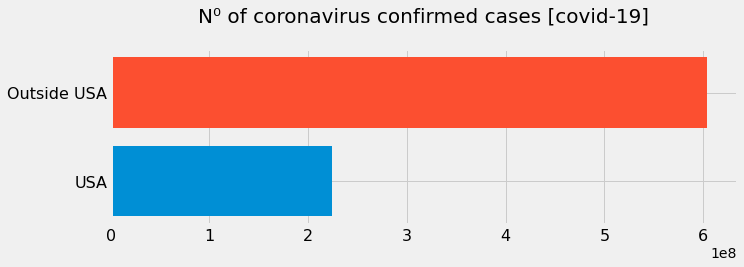


Outside USA: 604162534 cases
USA          : 224345948 cases
Total        : 828508482 cases


In [ ]:
USA_confirmed:int = latest_data[latest_data['Country/Region'] == 'US']['Confirmed'].sum()
outside_USA_confirmed:int = np.sum(country_confirmed_cases) - USA_confirmed

plt.figure(figsize=(10, 3))

plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)

plt.title('N⁰ of coronavirus confirmed cases [covid-19]\n', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

print('\nOutside USA: {} cases'.format(outside_USA_confirmed))
print('USA          : {} cases'.format(USA_confirmed))
print('Total        : {} cases'.format(USA_confirmed + outside_USA_confirmed))

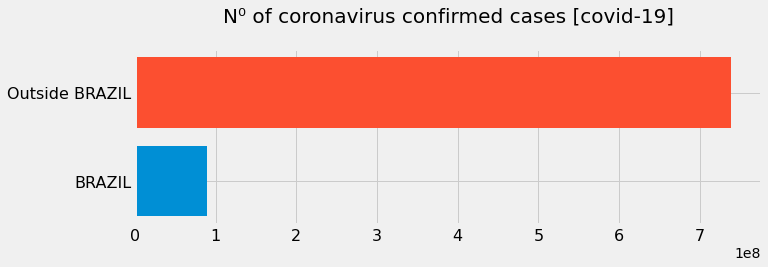


Outside BRAZIL: 738983515 cases
BRAZIL          : 89524967 cases
Total        : 828508482 cases


In [ ]:
BRA_confirmed = latest_data[latest_data['Country/Region'] == 'Brazil']['Confirmed'].sum()
outside_BRA_confirmed = np.sum(country_confirmed_cases) - BRA_confirmed

plt.figure(figsize=(10, 3))

plt.barh('BRAZIL', BRA_confirmed)
plt.barh('Outside BRAZIL', outside_BRA_confirmed)

plt.title('N⁰ of coronavirus confirmed cases [covid-19]\n', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

print('\nOutside BRAZIL: {} cases'.format(outside_BRA_confirmed))
print('BRAZIL          : {} cases'.format(BRA_confirmed))
print('Total        : {} cases'.format(BRA_confirmed + outside_BRA_confirmed))

In [ ]:
# def viz(country:str):  
#     COUNTRY_confirmed:int = latest_data[latest_data['Country/Region'] == country]['Confirmed'].sum()
#     outside_COUNTRY_confirmed:int = np.sum(country_confirmed_cases) - COUNTRY_confirmed

#     print(country)
#     print(COUNTRY_confirmed)
#     print(outside_COUNTRY_confirmed)

#     plt.figure(figsize=(10, 3))

#     plt.barh(f'{country}', COUNTRY_confirmed)
#     plt.barh(f'Outside {country}', outside_COUNTRY_confirmed)

#     plt.title('N⁰ of coronavirus confirmed cases [covid-19]\n', size=20)
#     plt.xticks(size=16)
#     plt.yticks(size=16)
#     plt.show()

#     print(f'\nOutside {country}: {outside_COUNTRY_confirmed} cases')
#     print(f'{country}: {COUNTRY_confirmed} cases')
#     print(f'Total: {(COUNTRY_confirmed + outside_COUNTRY_confirmed)} cases')

In [ ]:
# viz(country='BRAZIL')

In [ ]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(12, 7))

    plt.barh(x, y)

    plt.title(title, size=20)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

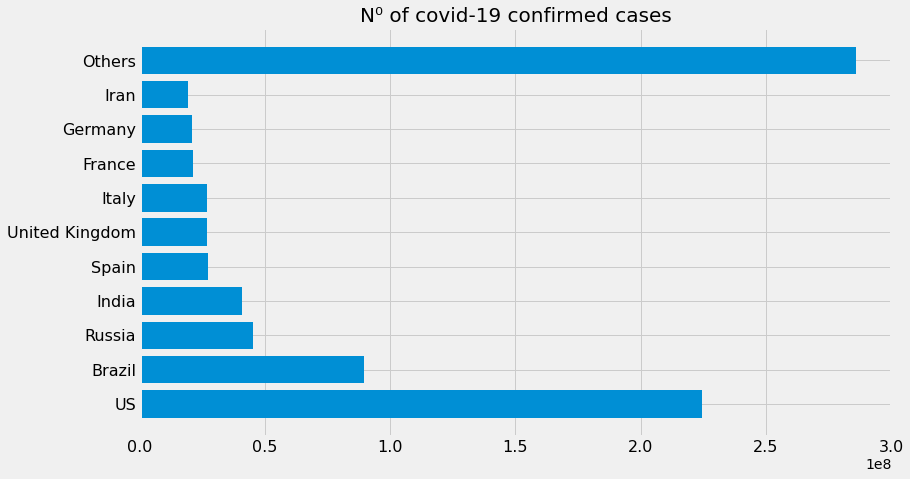

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases,
                title='N⁰ of covid-19 confirmed cases')

In [ ]:
def plot_pie_charts(x:int, y:int, title:str):
    c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))

    plt.figure(figsize=(18, 11))
    plt.title(title, size=20)
    
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=14)

    plt.show()

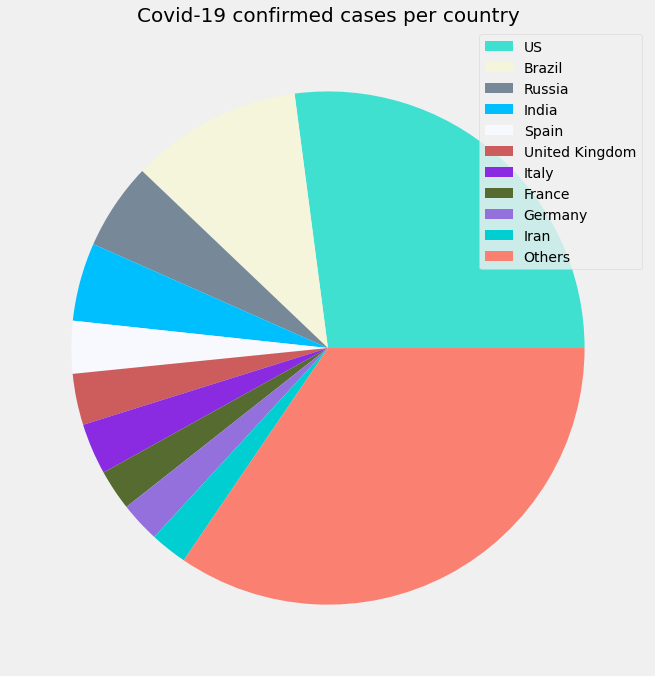

In [ ]:
plot_pie_charts(x=visual_unique_countries, y=visual_confirmed_cases,
                title='Covid-19 confirmed cases per country')

In [ ]:
visual_unique_provinces = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])

for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

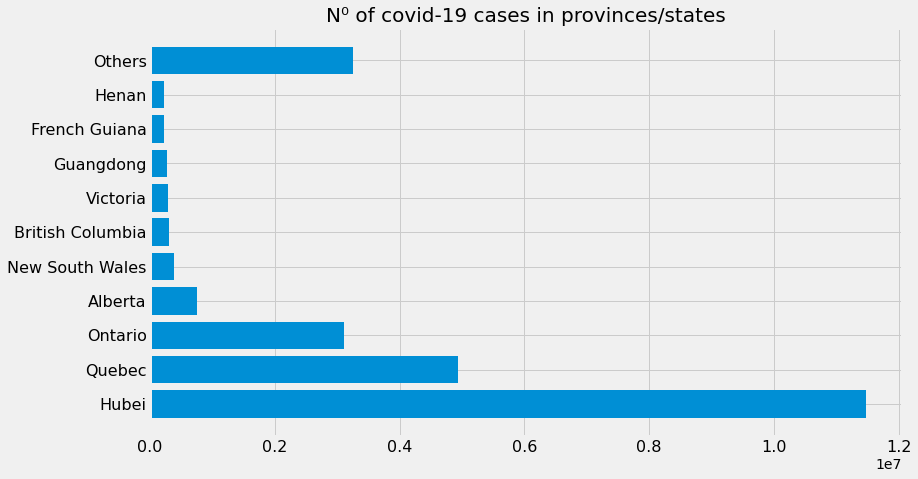

In [ ]:
plot_bar_graphs(x=visual_unique_provinces, y=visual_confirmed_cases2,
                title='N⁰ of covid-19 cases in provinces/states')

In [ ]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country/Region'] == country_name]['Province/State'].unique())
    
    confirmed_cases = []
    no_cases = []

    for i in regions:
        cases = latest_data[latest_data['Province/State'] == i]['Confirmed'].sum()

        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    for i in no_cases:
        regions.remove(i)

    regions:str = [k for k, v in sorted(zip(regions, confirmed_cases), 
                                        key=operator.itemgetter(1), 
                                        reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province/State'] == regions[i]]['Confirmed'].sum()

    if (len(regions) > 10):
        regions_10 = regions[:10]
        regions_10.append('Others')

        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))

        plot_pie_charts(regions_10, confirmed_cases_10, title)

    else:
        plot_pie_charts(regions, confirmed_cases, title)

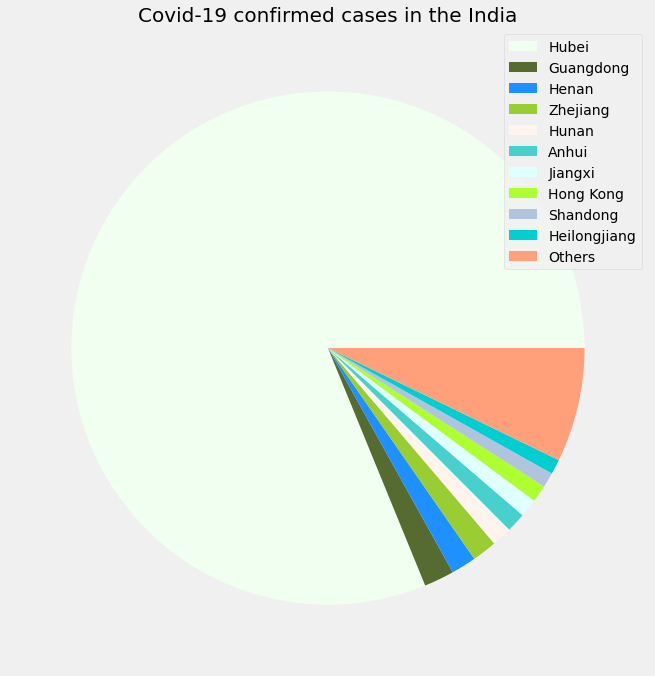

In [ ]:
plot_pie_country_with_regions('China', 'Covid-19 confirmed cases in the India')

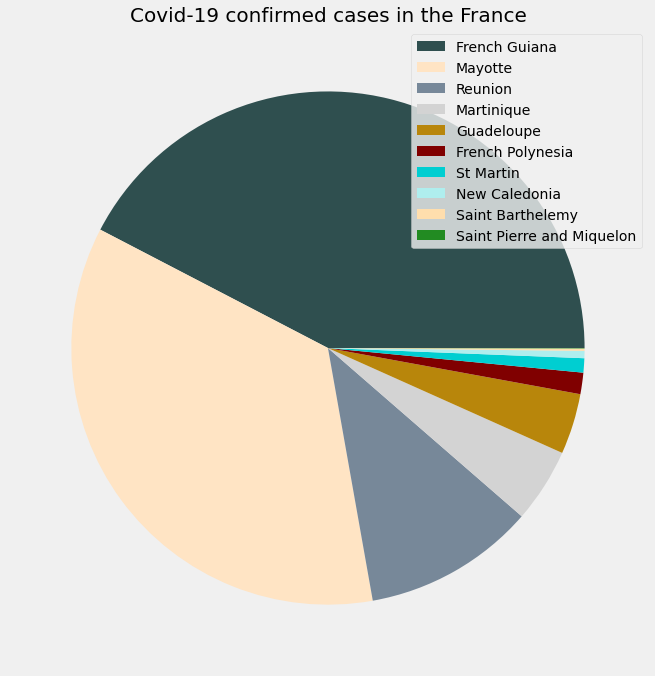

In [ ]:
plot_pie_country_with_regions('France', 'Covid-19 confirmed cases in the France')

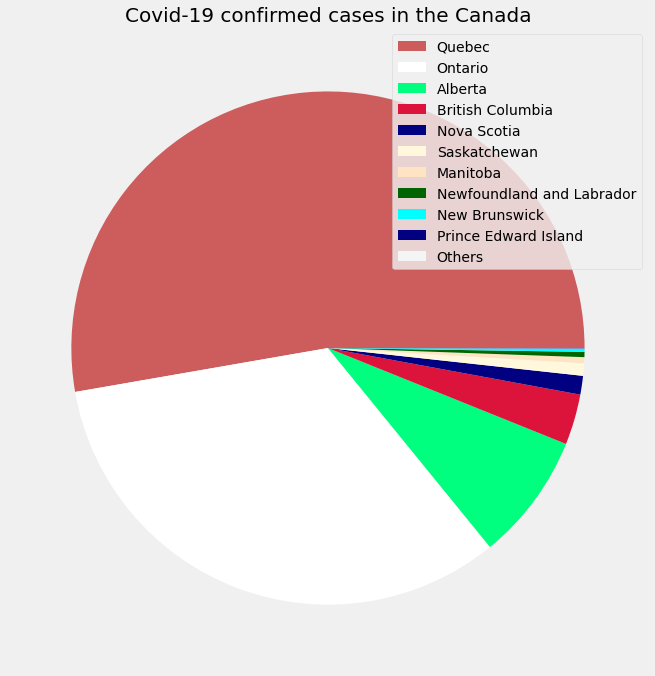

In [ ]:
plot_pie_country_with_regions('Canada', 'Covid-19 confirmed cases in the Canada')

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
start = '1/22/2020'
# end = '12/31/2020'

start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
# end_date = datetime.datetime.strptime(end, '%m/%d/%Y')

future_forecast_dates = []

# for end_date in range(len(future_forecast)):
#     future_forecast_dates.append((start_date + datetime.timedelta(days=end_date)).strftime('%d/%m/%Y'))

for end_date in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [ ]:
len(future_forecast_dates)

387

In [ ]:
len(days_since_1_22), len(world_cases)

(367, 367)

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    days_since_1_22, world_cases, test_size=0.2, 
    # random_state=1522, 
    shuffle=True
)

In [ ]:
len(X_train_confirmed), len(y_train_confirmed), len(X_test_confirmed), len(y_test_confirmed)

(293, 293, 74, 74)

In [ ]:
poly = PolynomialFeatures(degree=3)

poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)

poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False, n_jobs=-1)

linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
linear_test_pred = linear_model.predict(poly_X_test_confirmed) 

linear_pred = linear_model.predict(poly_future_forecast)

In [ ]:
len(linear_pred)

387

In [ ]:
print(f'MAE: {mae(linear_test_pred, y_test_confirmed)}')
print(f'MSE: {mse(linear_test_pred, y_test_confirmed)}')

MAE: 622642.6515813055
MSE: 646731099160.8105


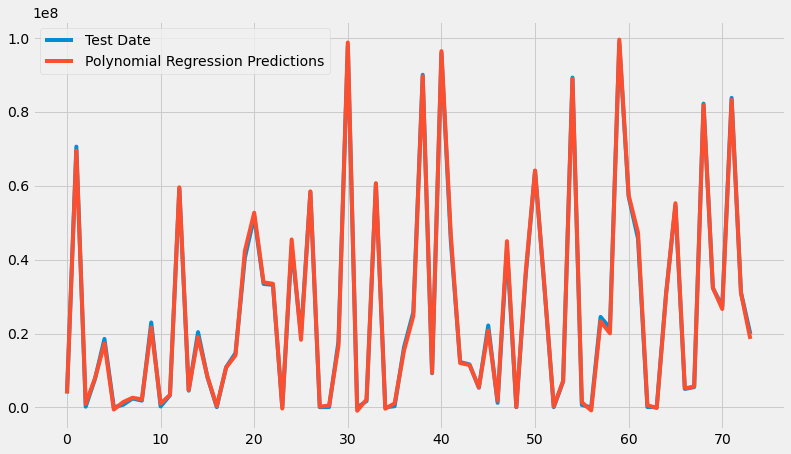

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(y_test_confirmed)
plt.plot(linear_test_pred)

plt.legend(['Test Date', 'Polynomial Regression Predictions'], loc='best');

In [ ]:
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, 
                    epsilon=1, degree=5, C=0.1)

svm_confirmed.fit(X_train_confirmed, y_train_confirmed)

svm_pred = svm_confirmed.predict(future_forecast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)

In [ ]:
print(f'MAE: {mae(svm_test_pred, y_test_confirmed)}')
print(f'MSE: {mse(svm_test_pred, y_test_confirmed)}')

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)

plt.legend(['Test Date', 'SVM Predictions']);

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

In [ ]:
len(adjusted_dates)

367

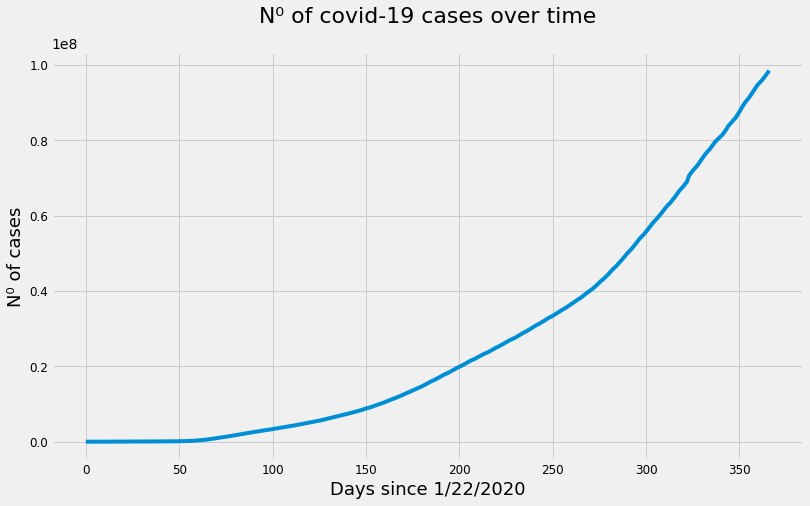

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(adjusted_dates, world_cases)

plt.title('N⁰ of covid-19 cases over time\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

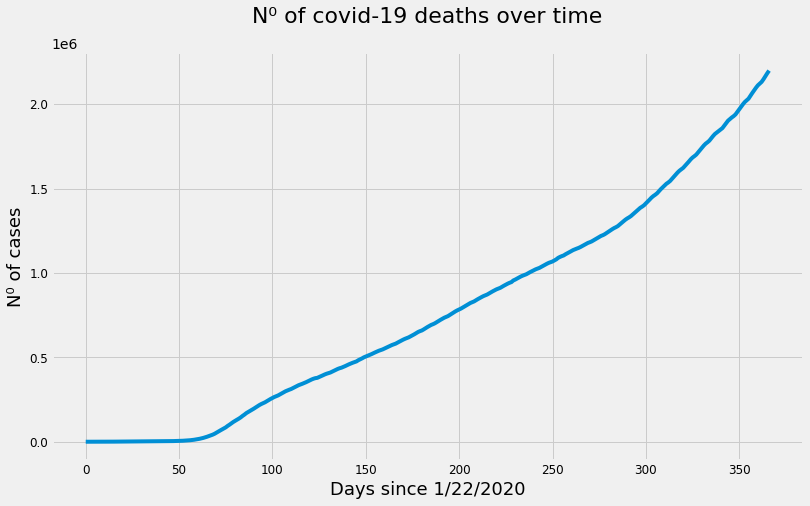

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(adjusted_dates, total_deaths)

plt.title('N⁰ of covid-19 deaths over time\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

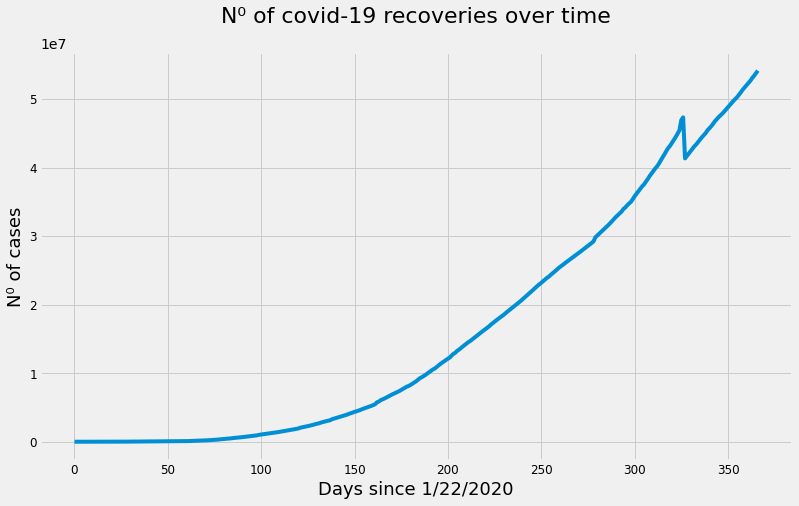

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(adjusted_dates, total_recovered)

plt.title('N⁰ of covid-19 recoveries over time\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

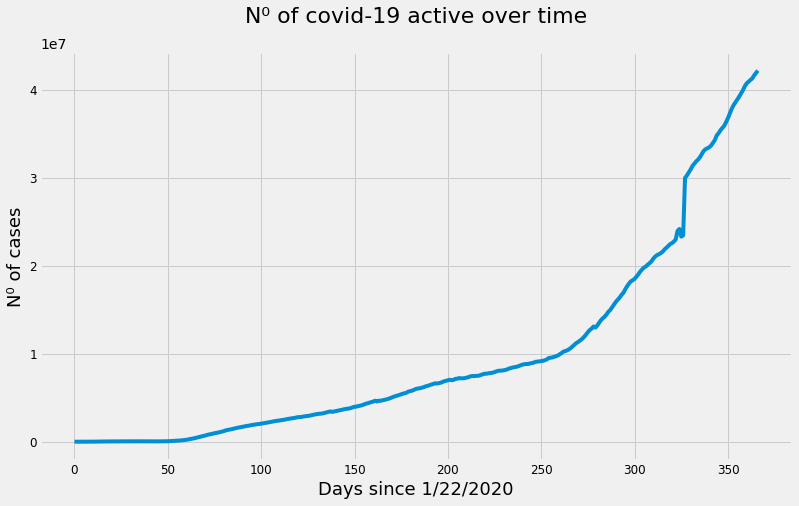

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(adjusted_dates, total_active)

plt.title('N⁰ of covid-19 active over time\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

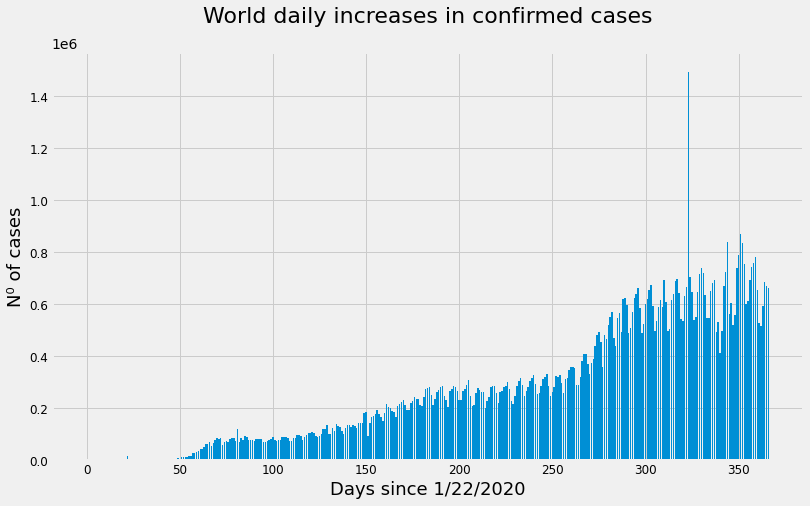

In [ ]:
plt.figure(figsize=(12, 7))

plt.bar(adjusted_dates, world_daily_increase)

plt.title('World daily increases in confirmed cases\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

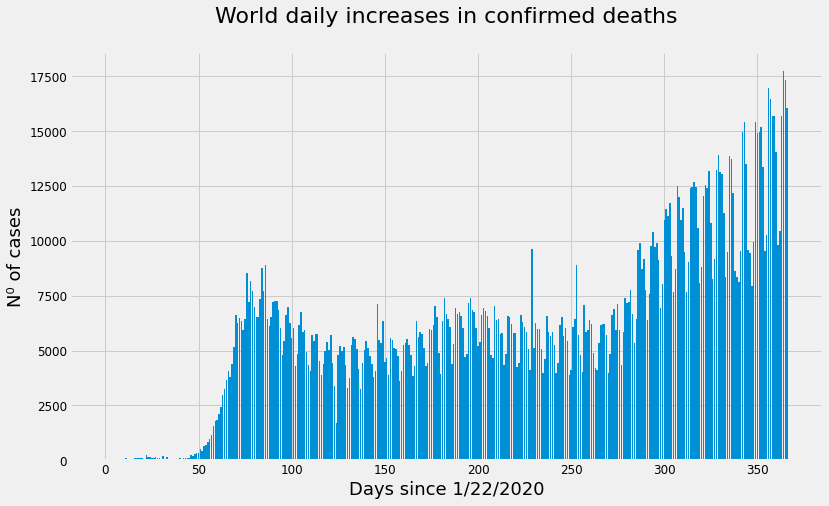

In [ ]:
plt.figure(figsize=(12, 7))

plt.bar(adjusted_dates, world_daily_death)

plt.title('World daily increases in confirmed deaths\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

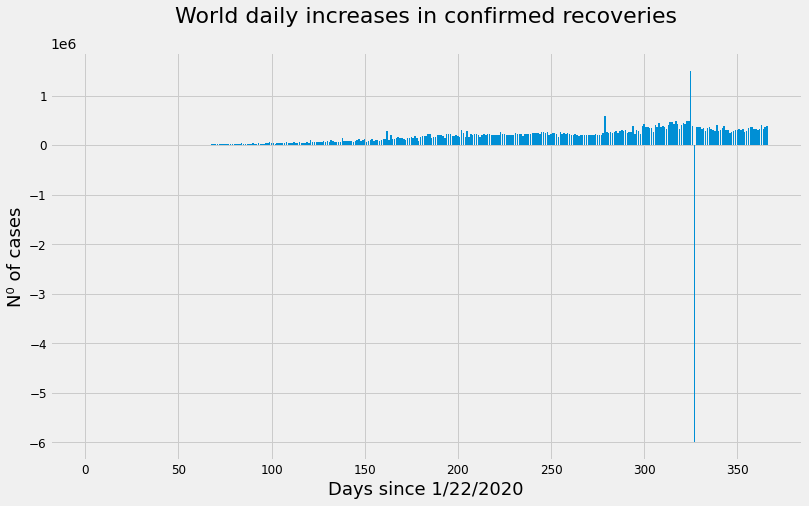

In [ ]:
plt.figure(figsize=(12, 7))

plt.bar(adjusted_dates, world_daily_recovery)

plt.title('World daily increases in confirmed recoveries\n', size=22)
plt.xlabel('Days since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [ ]:
def plot_predictions(x, y, pred, model, color):
    plt.figure(figsize=(12, 7))

    plt.plot(x, y)

    plt.plot(future_forecast, pred, linestyle='dashed', color=color)

    plt.title('N⁰ of covid-19 cases over time\n', size=20)
    plt.xlabel('Days since 1/22/2020', size=18)
    plt.ylabel('N⁰ of cases', size=18)
    plt.legend(['Confirmed cases', model], prop={'size': 16})
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.show()

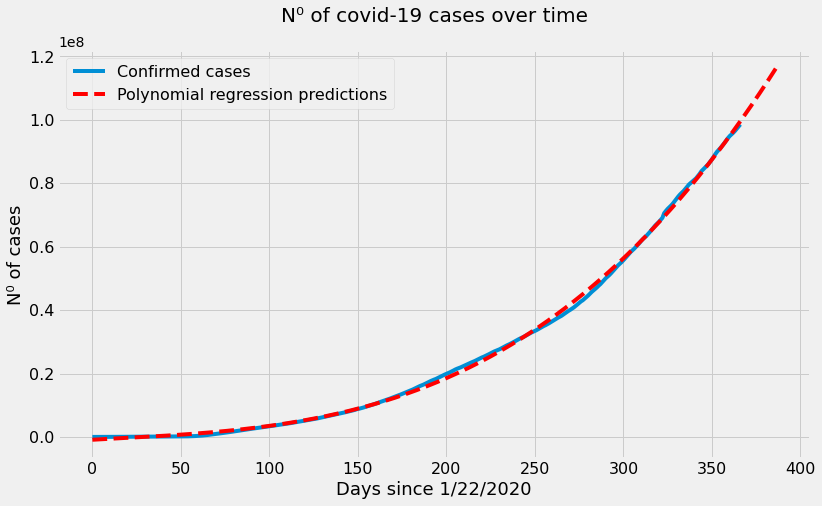

In [ ]:
plot_predictions(adjusted_dates, world_cases,
                 linear_pred,
                 'Polynomial regression predictions', 'red')

In [ ]:
plot_predictions(adjusted_dates, world_cases,
                 svm_pred, 
                 'SVM predictions', 'green')            

In [ ]:
linear_pred = linear_pred.reshape(1, -1)[0]

In [ ]:
len(linear_pred)

387

In [ ]:
len(future_forecast_dates), len(linear_pred)

(387, 387)

In [ ]:
poly_df = pd.DataFrame(
    {'Date': future_forecast_dates[-20:], 
     'Prediction number of covid-19 cases worldwide': np.round(linear_pred[-20:], 2)}
)

poly_df

,Date,Prediction number of covid-19 cases worldwide
0,31/01/2020,1.003258e+08
1,31/01/2020,1.011189e+08
2,31/01/2020,1.019163e+08
3,31/01/2020,1.027180e+08
4,31/01/2020,1.035240e+08
5,31/01/2020,1.043344e+08
6,31/01/2020,1.051491e+08
7,31/01/2020,1.059681e+08
8,31/01/2020,1.067915e+08
9,31/01/2020,1.076192e+08


In [ ]:
svm_df = pd.DataFrame(
    {'Date': future_forecast_dates[-20:], 
     'Prediction number of covid-19 cases worldwide': np.round(svm_pred[-20:], 2)}   
)

svm_df

NameError: ignored

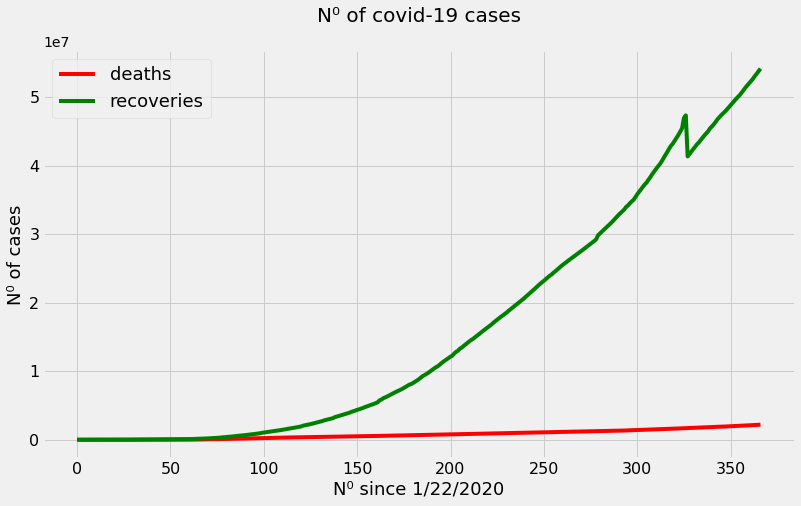

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='g')

plt.legend(['deaths', 'recoveries'], loc='best', fontsize=18)

plt.title('N⁰ of covid-19 cases\n', size=20)
plt.xlabel('N⁰ since 1/22/2020', size=18)
plt.ylabel('N⁰ of cases', size=18)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

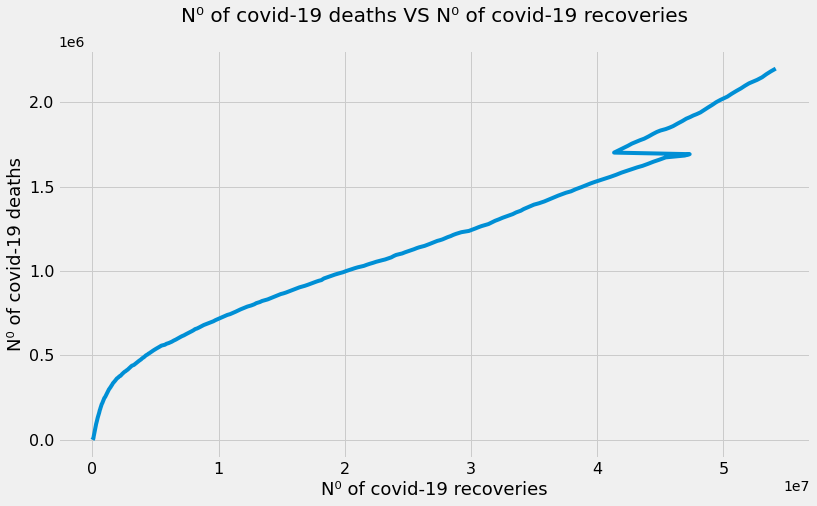

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(total_recovered, total_deaths)

plt.title('N⁰ of covid-19 deaths VS N⁰ of covid-19 recoveries\n', size=20)
plt.xlabel('N⁰ of covid-19 recoveries', size=18)
plt.ylabel('N⁰ of covid-19 deaths', size=18)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

In [ ]:
def country_plot(x, y1, y2, y3, y4, country):

    plt.figure(figsize=(12, 5))
    plt.plot(x, y1)
    plt.title(f'{country} confirmed cases\n', size=20)
    plt.xlabel('Days since 1/22/2020', size=20)
    plt.ylabel('N⁰ of cases', size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

    print('\n')

    plt.figure(figsize=(12, 5))
    plt.bar(x, y2)
    plt.title(f'{country} daily increases in confirmed cases\n', size=20)
    plt.xlabel('Days since 1/22/2020', size=20)
    plt.ylabel('N⁰ of cases', size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

    print('\n')

    plt.figure(figsize=(12, 5))
    plt.bar(x, y3)
    plt.title(f'{country} daily increases in deaths\n', size=20)
    plt.xlabel('Days since 1/22/2020', size=20)
    plt.ylabel('N⁰ of cases', size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

    print('\n')

    plt.figure(figsize=(12, 5))
    plt.bar(x, y4)
    plt.title(f'{country} daily increases in recoveries\n', size=20)
    plt.xlabel('Days since 1/22/2020', size=20)
    plt.ylabel('N⁰ of cases', size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

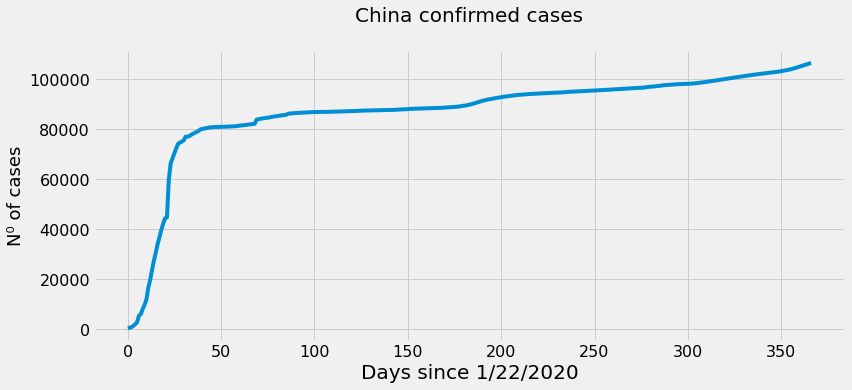

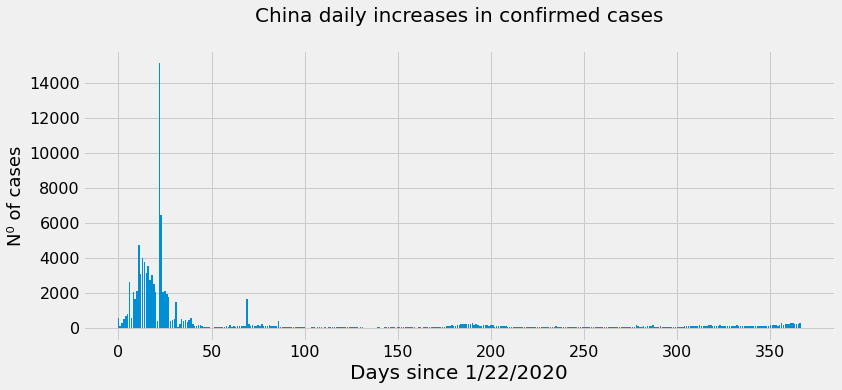

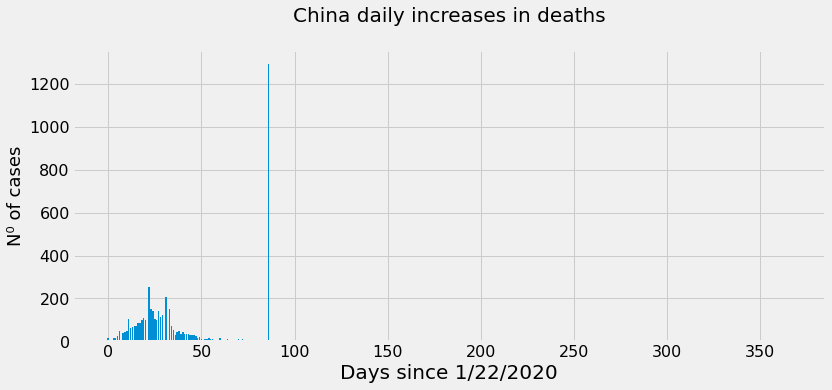

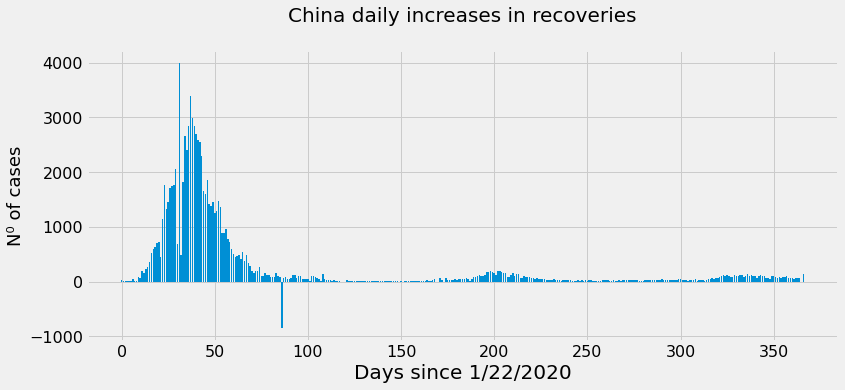

In [ ]:
country_plot(adjusted_dates, 
             china_cases, 
             china_daily_increase, 
             china_daily_deaths, 
             china_daily_recovery, 
             'China')

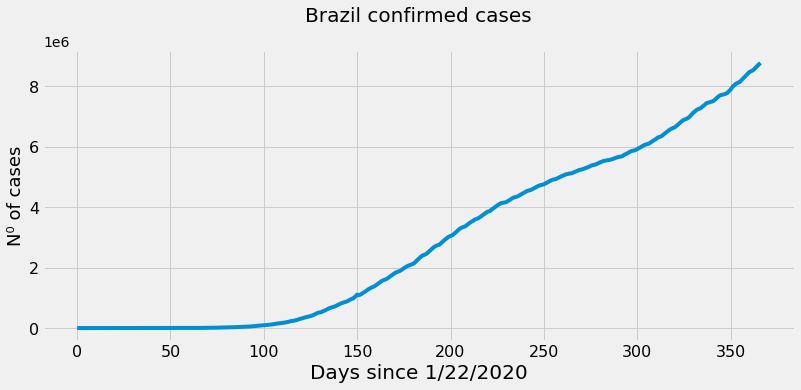

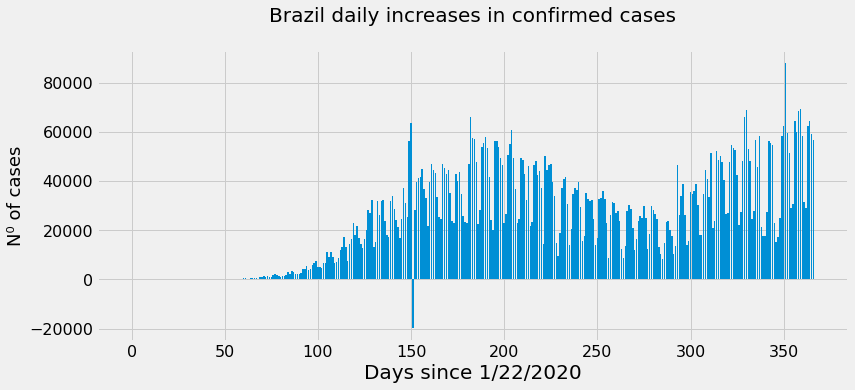

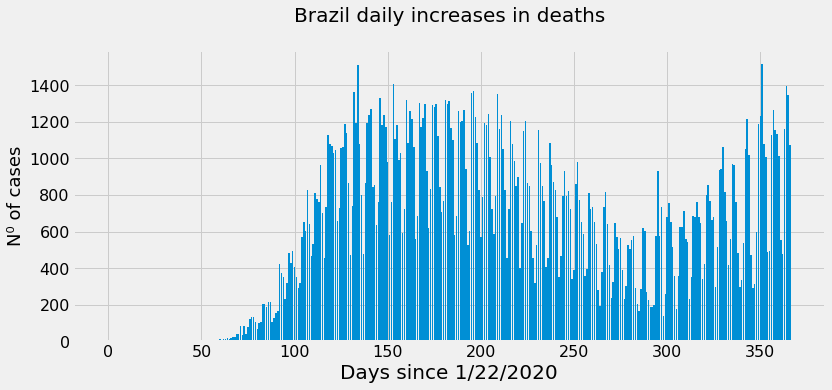

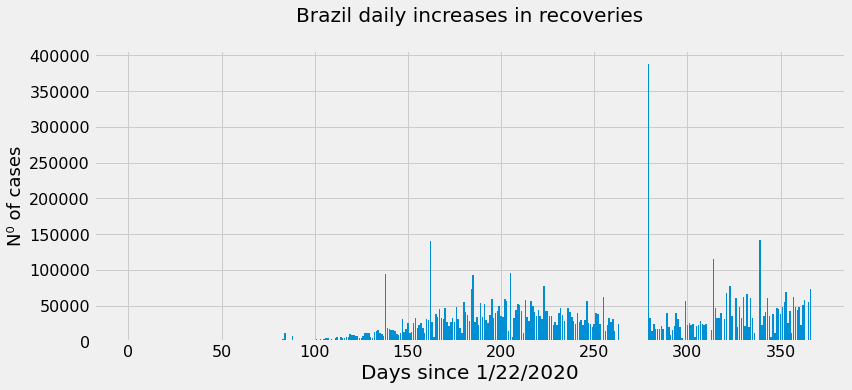

In [ ]:
country_plot(adjusted_dates, 
             brazil_cases, 
             brazil_daily_increase, 
             brazil_daily_deaths, 
             brazil_daily_recovery, 
             'Brazil')

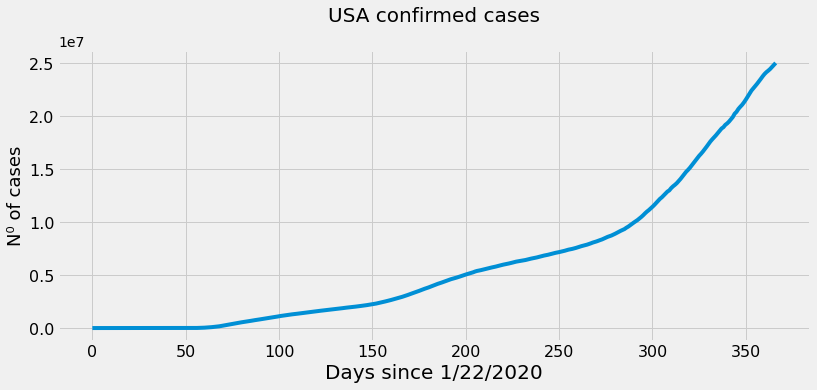

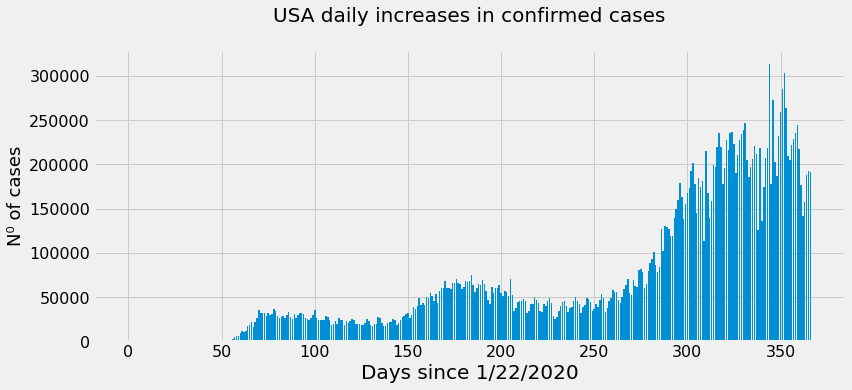

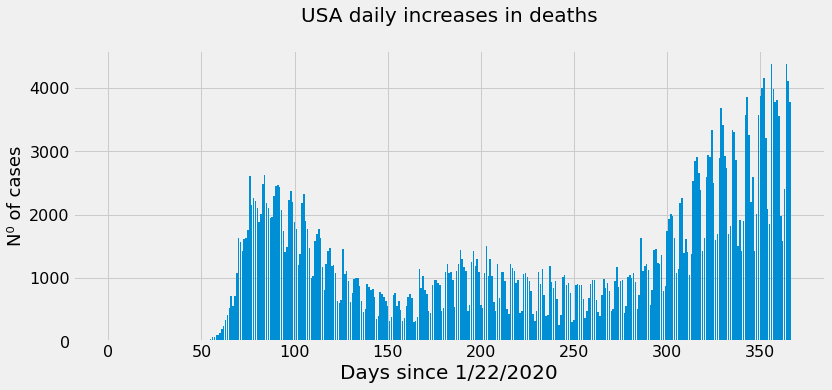

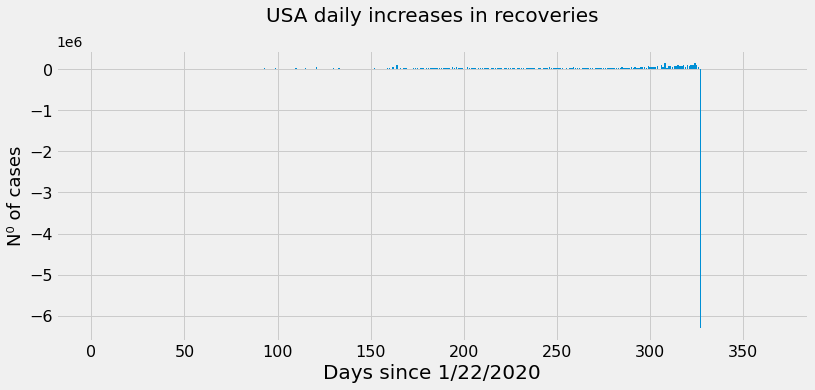

In [ ]:
country_plot(adjusted_dates, 
             usa_cases, 
             usa_daily_increase, 
             usa_daily_deaths, 
             usa_daily_recovery, 
             'USA')

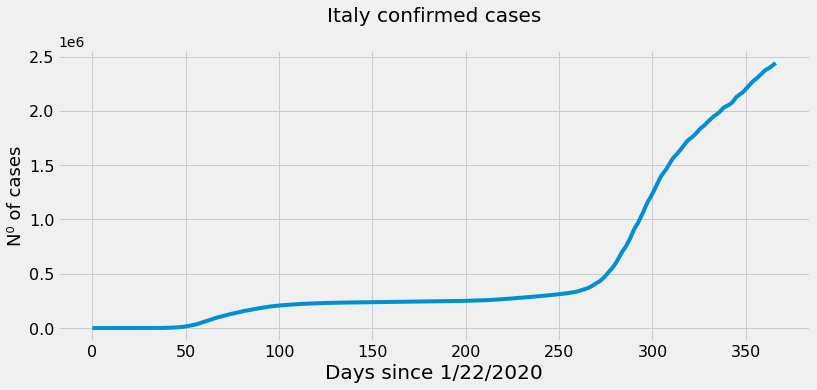

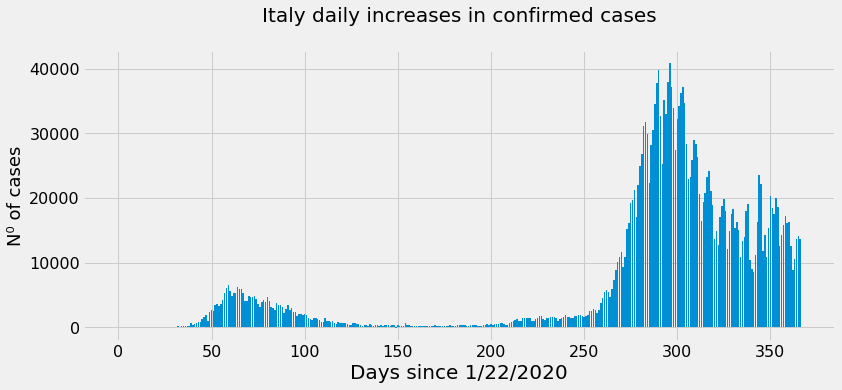

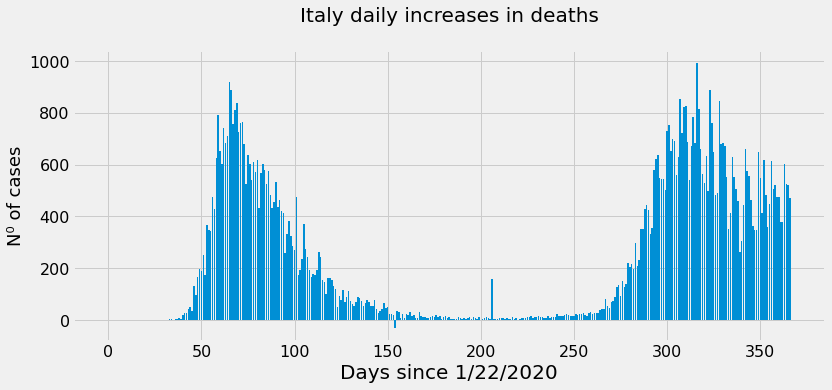

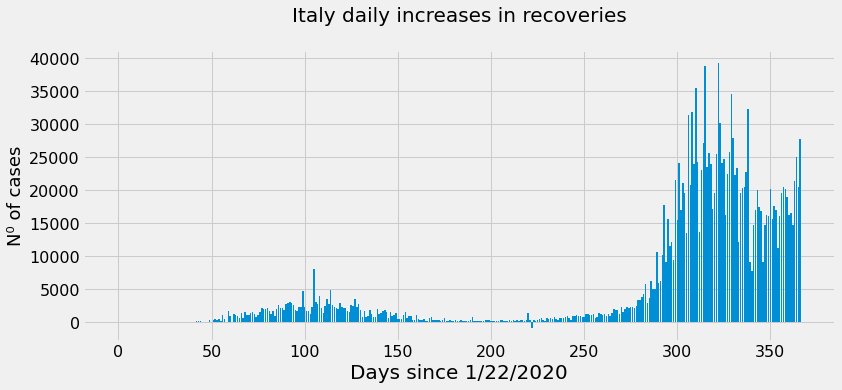

In [ ]:
country_plot(adjusted_dates, 
             italy_cases, 
             italy_daily_increase, 
             italy_daily_deaths, 
             italy_daily_recovery, 
             'Italy')

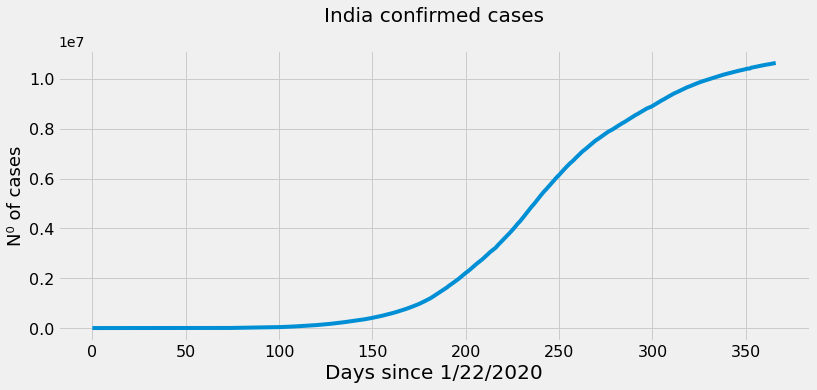

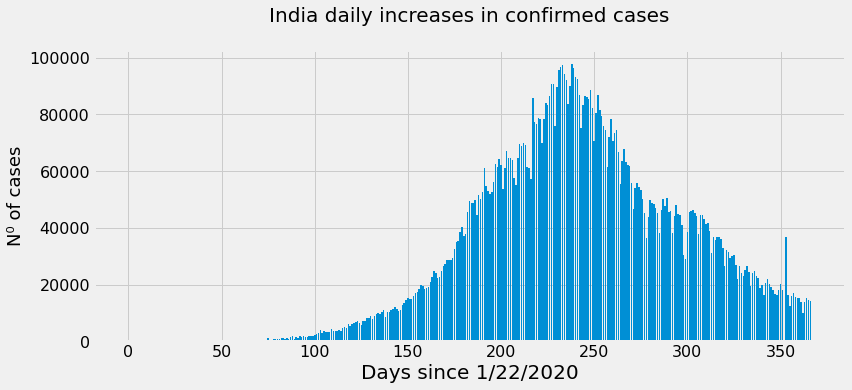

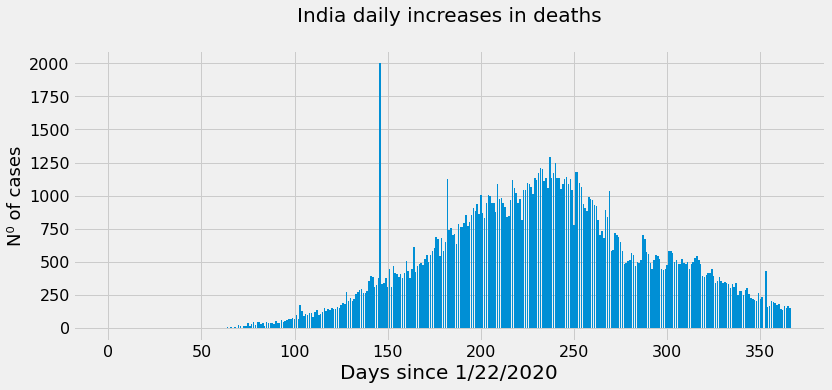

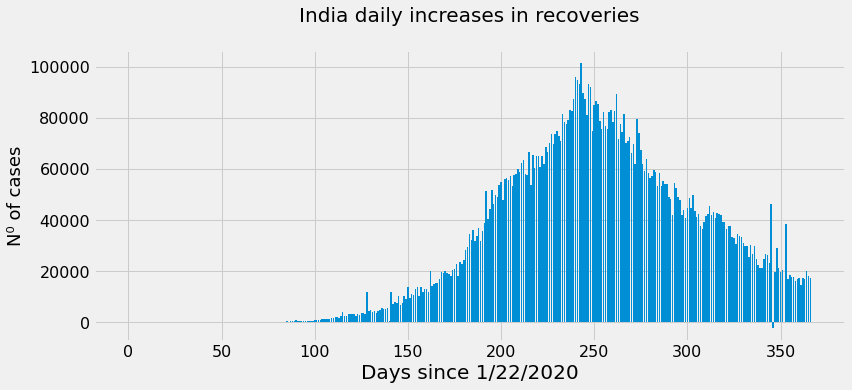

In [ ]:
country_plot(adjusted_dates, 
             india_cases, 
             india_daily_increase, 
             india_daily_deaths, 
             india_daily_recovery, 
             'India')

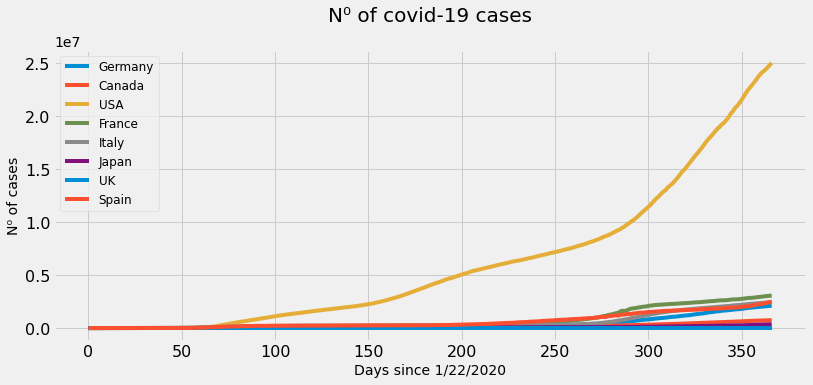

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, canada_cases)
plt.plot(adjusted_dates, usa_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, japan_cases)
plt.plot(adjusted_dates, uk_cases)
plt.plot(adjusted_dates, spain_cases)

plt.title('N⁰ of covid-19 cases\n', size=20)
plt.xlabel('Days since 1/22/2020', size=14)
plt.ylabel('N⁰ of cases', size=14)
plt.legend(['Germany', 'Canada', 'USA', 'France', 'Italy', 'Japan', 'UK', 'Spain'], loc='best', fontsize=12)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

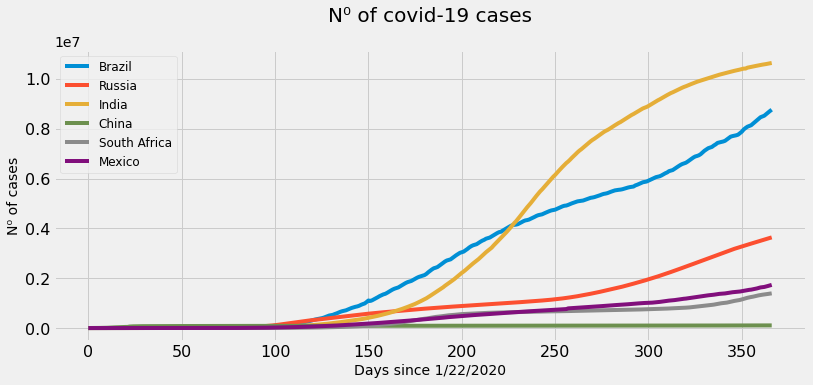

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(adjusted_dates, brazil_cases)
plt.plot(adjusted_dates, russia_cases)
plt.plot(adjusted_dates, india_cases)
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, south_africa_cases)
plt.plot(adjusted_dates, mexico_cases)


plt.title('N⁰ of covid-19 cases\n', size=20)
plt.xlabel('Days since 1/22/2020', size=14)
plt.ylabel('N⁰ of cases', size=14)
plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico'], loc='best', fontsize=12)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

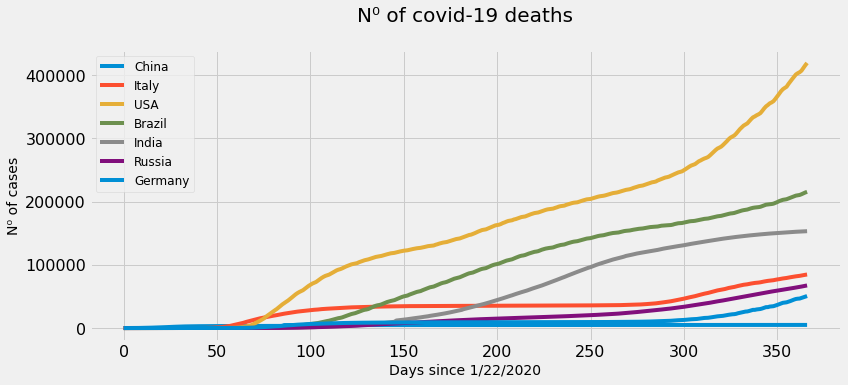

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, usa_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.plot(adjusted_dates, russia_deaths)
plt.plot(adjusted_dates, germany_deaths)

plt.title('N⁰ of covid-19 deaths\n', size=20)
plt.xlabel('Days since 1/22/2020', size=14)
plt.ylabel('N⁰ of cases', size=14)
plt.legend(['China', 'Italy', 'USA', 'Brazil', 'India', 'Russia', 'Germany'], loc='best', fontsize=12)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

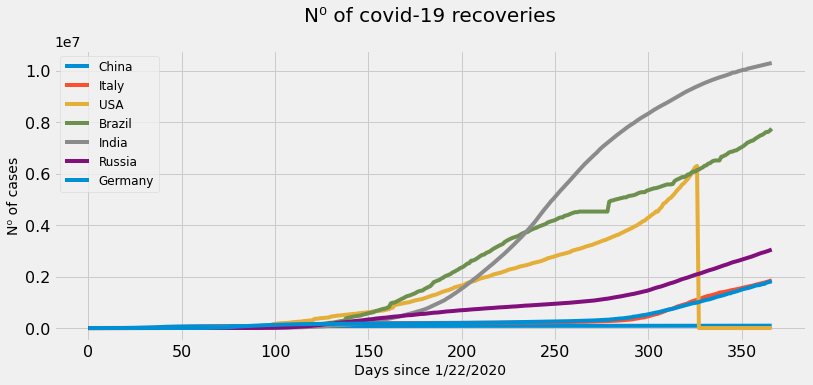

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, usa_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.plot(adjusted_dates, russia_recoveries)
plt.plot(adjusted_dates, germany_recoveries)

plt.title('N⁰ of covid-19 recoveries\n', size=20)
plt.xlabel('Days since 1/22/2020', size=14)
plt.ylabel('N⁰ of cases', size=14)
plt.legend(['China', 'Italy', 'USA', 'Brazil', 'India', 'Russia', 'Germany'], loc='best', fontsize=12)

plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

In [ ]:
%whos

Variable                        Type                  Data/Info
---------------------------------------------------------------
BRA_confirmed                   int64                 89524967
LinearRegression                ABCMeta               <class 'sklearn.linear_mo<...>._base.LinearRegression'>
PolynomialFeatures              type                  <class 'sklearn.preproces<...>mial.PolynomialFeatures'>
SVR                             ABCMeta               <class 'sklearn.svm._classes.SVR'>
USA_confirmed                   int64                 224345948
X_test_confirmed                ndarray               74x1: 74 elems, type `int64`, 592 bytes
X_train_confirmed               ndarray               293x1: 293 elems, type `int64`, 2344 bytes
adjusted_dates                  ndarray               367: 367 elems, type `int64`, 2936 bytes
brazil_cases                    list                  n=367
brazil_daily_deaths             list                  n=367
brazil_daily_increase         

In [ ]:
%who_ls 

['BRA_confirmed',
 'LinearRegression',
 'PolynomialFeatures',
 'SVR',
 'USA_confirmed',
 'X_test_confirmed',
 'X_train_confirmed',
 'adjusted_dates',
 'brazil_cases',
 'brazil_daily_deaths',
 'brazil_daily_increase',
 'brazil_daily_recovery',
 'brazil_deaths',
 'brazil_recoveries',
 'canada_cases',
 'canada_daily_deaths',
 'canada_daily_increase',
 'canada_daily_recovery',
 'canada_deaths',
 'canada_recoveries',
 'cases',
 'china_cases',
 'china_daily_deaths',
 'china_daily_increase',
 'china_daily_recovery',
 'china_deaths',
 'china_recoveries',
 'cols_interest',
 'cols_limit',
 'confirmed',
 'confirmed_cases',
 'confirmed_sum',
 'country_active_cases',
 'country_confirmed_cases',
 'country_death_cases',
 'country_df',
 'country_mortality_rate',
 'country_plot',
 'country_recovery_cases',
 'daily_increase',
 'dates',
 'datetime',
 'day_today',
 'days_in_future',
 'days_since_1_22',
 'days_year',
 'death_cases',
 'death_sum',
 'deaths',
 'end_date',
 'france_cases',
 'france_daily_deat